<a href="https://colab.research.google.com/github/uni-3/ml-at-work-exercise/blob/master/notebooks/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 仮説検定(hypotheses testing)
p110 -

事象の生じる確率が低いとかの度合いを判定するときに使う

帰無仮説(null hypotheses)、対立仮説(alternative hypothesis)を立て、どちらが真であるかを検定する

コイントスの例では

帰無仮説：表の出る確率は50％

対立仮説：表の出る確率は50％と異なる

帰無仮説が真であるとした時の確率をp-valueという

p-valueの閾値は任意、5%より低い場合は帰無仮説を棄却する、などとする

この閾値を有意水準(significant level)という

有意水準 0.05の時、下の帰無仮説は棄却される、

0.01のとき、帰無仮説は棄却されない



In [0]:
!pip install japanize-matplotlib

    100% |████████████████████████████████| 4.1MB 6.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/47/d1/ba/1a686af7cc042edde2c2f4cb18bd981f7eefdcbfe688590d25
Successfully built japanize-matplotlib


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.stats

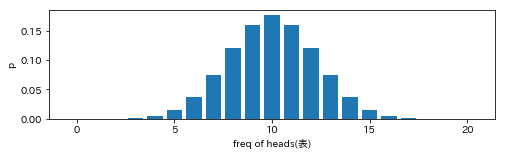

In [0]:
# 20回コインを投げると、１０回表が出る確率が高い
# 二項分布
x = np.arange(0, 21)
y = scipy.stats.binom.pmf(x, 20, 0.5)

plt.figure(figsize=(8, 2))
plt.bar(x, y)
plt.xlabel('freq of heads(表)')
plt.ylabel('p')
plt.show()

In [0]:
# 15回以上表の出る確率pは2%くらい
p_value = pd.DataFrame({'n_heads': x
                        , 'p': y}).query('n_heads >= 15')['p'].sum()

p_value

0.02069473266601554

#### 二群の母比率の差の検定

In [0]:
# 継続人数、離脱人数
# サンプルサイズが大きいので、二項分布を正規近似する
a = [40, 165]
b = [62, 228]

print('a: size = {}, converted = {}, mean = {:.3f}'.format(sum(a), a[0], a[0]/sum(a)))

print('b: size = {}, converted = {}, mean = {:.3f}'.format(sum(b), b[0], b[0]/sum(b)))

a: size = 205, converted = 40, mean = 0.195
b: size = 290, converted = 62, mean = 0.214


In [0]:
x = np.linspace(0, 1, 200)

In [0]:
# aからきた人の分布
n = sum(a)
p = a[0] / n
std = np.sqrt(p*(1-p)/n)

y_a = scipy.stats.norm.pdf(x, p, std)

In [0]:
# bからきた人の分布
n = sum(b)
p = b[0] / n
std = np.sqrt(p*(1-p)/n)

y_b = scipy.stats.norm.pdf(x, p, std)

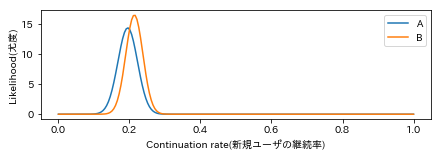

In [0]:
plt.figure(figsize=(7, 2))
plt.plot(x, y_a, label='A')
plt.plot(x, y_b, label='B')

plt.legend(loc='best')
plt.xlabel('Continuation rate(新規ユーザの継続率)')
plt.ylabel('Likelihood(尤度)')
plt.show()

In [0]:
# 仮説検定にて、Bのがいいのかどうか検定する
# 帰無仮説：継続化率等しい
# 対立仮設：継続化率差がある
# p-value 0.05

# カイ二乗検定
# 帰無仮説は棄却できない、差があるとは言えない、という結論
_, p_value, _, _ = scipy.stats.chi2_contingency([a, b])
p_value

0.694254736449269

#### 仮説検定の注意点
- 何回も検定をすると、標本を変えて検定すると偶然有意差が出たりする
たまに、p値が低くなる瞬間がある、偽陽性の確率が増える


In [0]:
mu = 0.5
init_sample = list(scipy.stats.bernoulli.rvs(mu, size=20))

sample = init_sample
p_value_history = []
for i in range(200):
    # 直近のサンプルで検定
    _, p_value = scipy.stats.ttest_1samp(sample[-20:], 0.5)
    p_value_history.append(p_value)
    # 新たにサンプル追加
    sample.append(scipy.stats.bernoulli.rvs(mu))

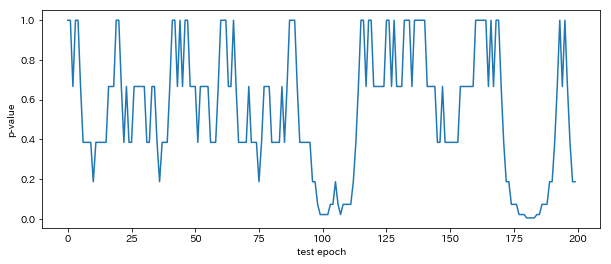

In [0]:
plt.figure(figsize=(10, 4))
plt.plot(p_value_history)
plt.xlabel('test epoch')
plt.ylabel('p-value')
plt.show()

In [0]:
# 95%信頼区間をみる
from statsmodels.stats.proportion import proportion_confint

In [0]:
# 平均の差が小さい、確かに差は出るが、問題に対して意味のある差なのか注意する必要がある
a2 = scipy.stats.bernoulli.rvs(0.451, size=3000000)
b2 = scipy.stats.bernoulli.rvs(0.452, size=3000000)

a_lower, a_upper = proportion_confint(sum(a2), len(a2), alpha=0.05, method='wilson')
b_lower, b_upper = proportion_confint(sum(b2), len(b2), alpha=0.05, method='wilson')

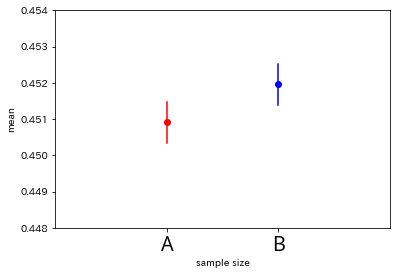

In [0]:
plt.plot(1, np.mean(a2), 'ro')
plt.plot(2, np.mean(b2), 'bo')

plt.plot([1, 1], [a_lower, a_upper], 'r-')
plt.plot([2, 2], [b_lower, b_upper], 'b-')

plt.ylim(0.448, 0.454)
plt.xlim(0, 3)
plt.xticks([1, 2], ['A', 'B'], fontsize=20)
plt.xlabel('sample size')
plt.ylabel('mean')

plt.show()

#### 複数の検定を同時に行う
複数の仮設を検定する多重検定(multiple testion)という

複数の説明変数に対して、
目的関数と有意に相関があるかみるときに使う

説明変数の数Mだけ検定を行う、すなわち、説明変数が多くなるにつれ、偽陽性が起こる確率も大きくなる

これを抑制するには、

1つでも誤った発見をする確率(family wise error rate: FWER)を抑制する方法と

有意水準をaからa/Mにするなどする。この方法だと、有意水準が下がっていき、検定力（帰無仮説が誤りである場合に、正しく帰無仮説を棄却できる確率）が落ちる

誤った発見の割合(false discovery rate: FDR)を抑制する方法がある

検定力がほしいときにはこちらを用いる



#### 因果効果の推定

ルービンの因果モデル

- 介入(cause)：広告を見せる
- 結果変数(outcom): 購買行動

介入した標本を介入群 or 実験群

介入してない標本を対象群 or 統制群と呼ぶ

実際には同じ人が広告を見た、か見ないのどちらかになるため、観測できるのは介入したかしていない場合のどちらかになる。

片方観測されればもう片方は反事実(counter factual)となり、観測できない。

ルービンの因果モデルでは観測できないが潜在的に存在しうる結果変数を考え、それを潜在的結果変数と呼ぶ